# Frequentist statistics 
### Data set report 2024

## Abstract

The aim of this study is to determine the impact of several factors such as The number of bathrooms and bedrooms, living space square footage, basement presence, total area above ground, etc. On the housing prices in the king County area in Washington with the help of a multiple linear regression model. After analyzing this model, the property being waterfront, the overall property grade, the year in which the house was built, the amount of floors present inside the building and the presence of a basement, were determined to be the most significant predictors of housing price. These 5 variables, out of a total of 19 variables prove to be the most influential in predicting housing proces in the King County area of Washington between 2014-2015. 

## Introduction

The housing market is an ever evolving field influenced by numerous factors at the same time. Predicting housing prices is an intricate task. The fluctuating prices are dependent on a variety of factors, ranging from objective property size to personal preferences. Some of these factors are; living space in square footage, number of floors in the house, view quality and house condition.
By employing multiple regression analysis, we aim to quantify the relationship between housing prices and several key predictors. With this research we wish to increase the clarity about the property prices in the continuously changing housing market. Understanding what drives housing prices in this dynamic and complex region is not only of interest to homeowners and potential home buyers but also beneficial for policymakers and urban planners.

#### Hypothesis

H0 (Null Hypothesis): The number of bathrooms and bedrooms, living space square footage, basement presence, total area above ground, number of floors in the house, view quality,
house condition, the year it was constructed, the number of years since it was renovated, and the grade of the building’s construction and design do not predict housing prices.

HA (Alternative Hypothesis): The number of bathrooms and bedrooms, living space square footage, basement presence, total area above ground, number of floors in the house, view quality,
house condition, the year it was constructed, the number of years since it was renovated, and the grade of the building’s construction and design can predict housing prices.


## Data set

The dataset that will be used for multiple regression was found on kaggle<sup>1</sup> and uploaded by the user harlfoxem. The data comes from the real estate markets in King County, Washington State, USA, for the years 2014-2015. The dataset consists of approximately 22,000 properties. These individual data points supposedly come from the official King County government website<sup>2</sup> and were later added together to form the dataset that will be used. We could not verify that the individual data points did indeed come from the government database due to functionality issues surrounding the official site. 
The dataset itself includes 19 columns. 5 columns will immediately be excluded as these do not contribute to the answering of our alternative hypothesis. These columns are; id, date, zipcode, latitude and longitude.
The rows that have been included are: price, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15

The dataset does not contain any missing values. 




#### Population

With the sample of housing prices in the King County area of the Washington state in the years of 2014-2015, we will attempt to generalize our findings to the population of all housing properties in said area (e.c. king County) for the corresponding time span (years 2014-2015). The total number of housing units in the King County area in 2010 was 851261. We weren't able to find the number of homes for the target years of this study, but we assume that the numbers don't vary significantly in those couple years.

#### Response Variable

The response variable that will be investigated is price. Price is a continuous variable spanning from 0 to infinity. The price range for this dataset ranges between 0 and 8 million US dollars. The distribution of the response variable is generated in the distribution of housing prices plotted later on in the report. To further analyse the normality of the distribution a QQ plot will also be generated later on. If the data distribution follows the diagonal line in the plot, it suggests that the data is normally distributed.

#### Explanatory variables

To determine if the housing price can accurately be predicted a number of variables will be used. All of the variables used will be numerical. 
The following variables will be examined:

1. The first variable, bedrooms, refers to the amount of bedrooms in the house. This variable is discrete and ranges between 0-33 in the dataset. 

2. The second variable, bathrooms, refers to the amount of bathrooms present in the building. This variable is discrete just like the bedroom variable. The variable ranges between 0-8 in the dataset.

3. The third variable, sqft_living, refers to the amount of square feet of space inside the house. This variable is continous and ranges between roughly 200-14000 sqft in the dataset.

4. The fourth variable, waterfront, refers to the quality of the waterfront view. This variable is discrete and ranges between 0-1 in the dataset.

5. The fifth variable, floors, refers to the amount of floors present inside the house. The variable is discrete and ranges between 1-3.5 in the dataset.

6. The sixth variable, view, refers to the quality of the view. This variable is discrete and can range between 0-4 in the dataset.

7. The seventh variable, condition, refers to the condition of the building. This variable is discrete and can range between 1-5 in the dataset.

8. The eight variable, sqft_above, refers to the amount of square feet of property located above ground level. This variable is continous and can take on a value between roughly 400-10000 sqft in the dataset.

9. The ninth variable, sqft_basement, refers to the amount of square feet located below ground level. This variable is continous just like sqft_above, and can take on a value between 0-5000 sqft in the dataset.

10. The tenth variable, yr_built, refers to the year in which the house was built. The variable is discrete and can range between 1900-2015 in the dataset.

11. The eleventh variable, yr_renovated refers to the year in which the house was renovated. This variable includes a large amount of variable with the value 0. This means that the building has not yet been renovated. The variable is continous and can range between 0-2015, although it is important to point out that the variables either take on a value of 0 or range between roughly 1950-2015 in the dataset. 

12. The twelfth variable, grade, refers to the overall grade given to the building’s construction and design. This variable is discrete and ranges between 1-13 in the dataset.

13. the 13th and final variable sqft_living15, refers to the total square feet of outside property space of the 15 closest neighbours. This variable is continuous and ranges between 0-200000 square feet  in the dataset.


To fit the model, every explanatory variable should undergo univariate analysis. The code below has been used to visualize the data.

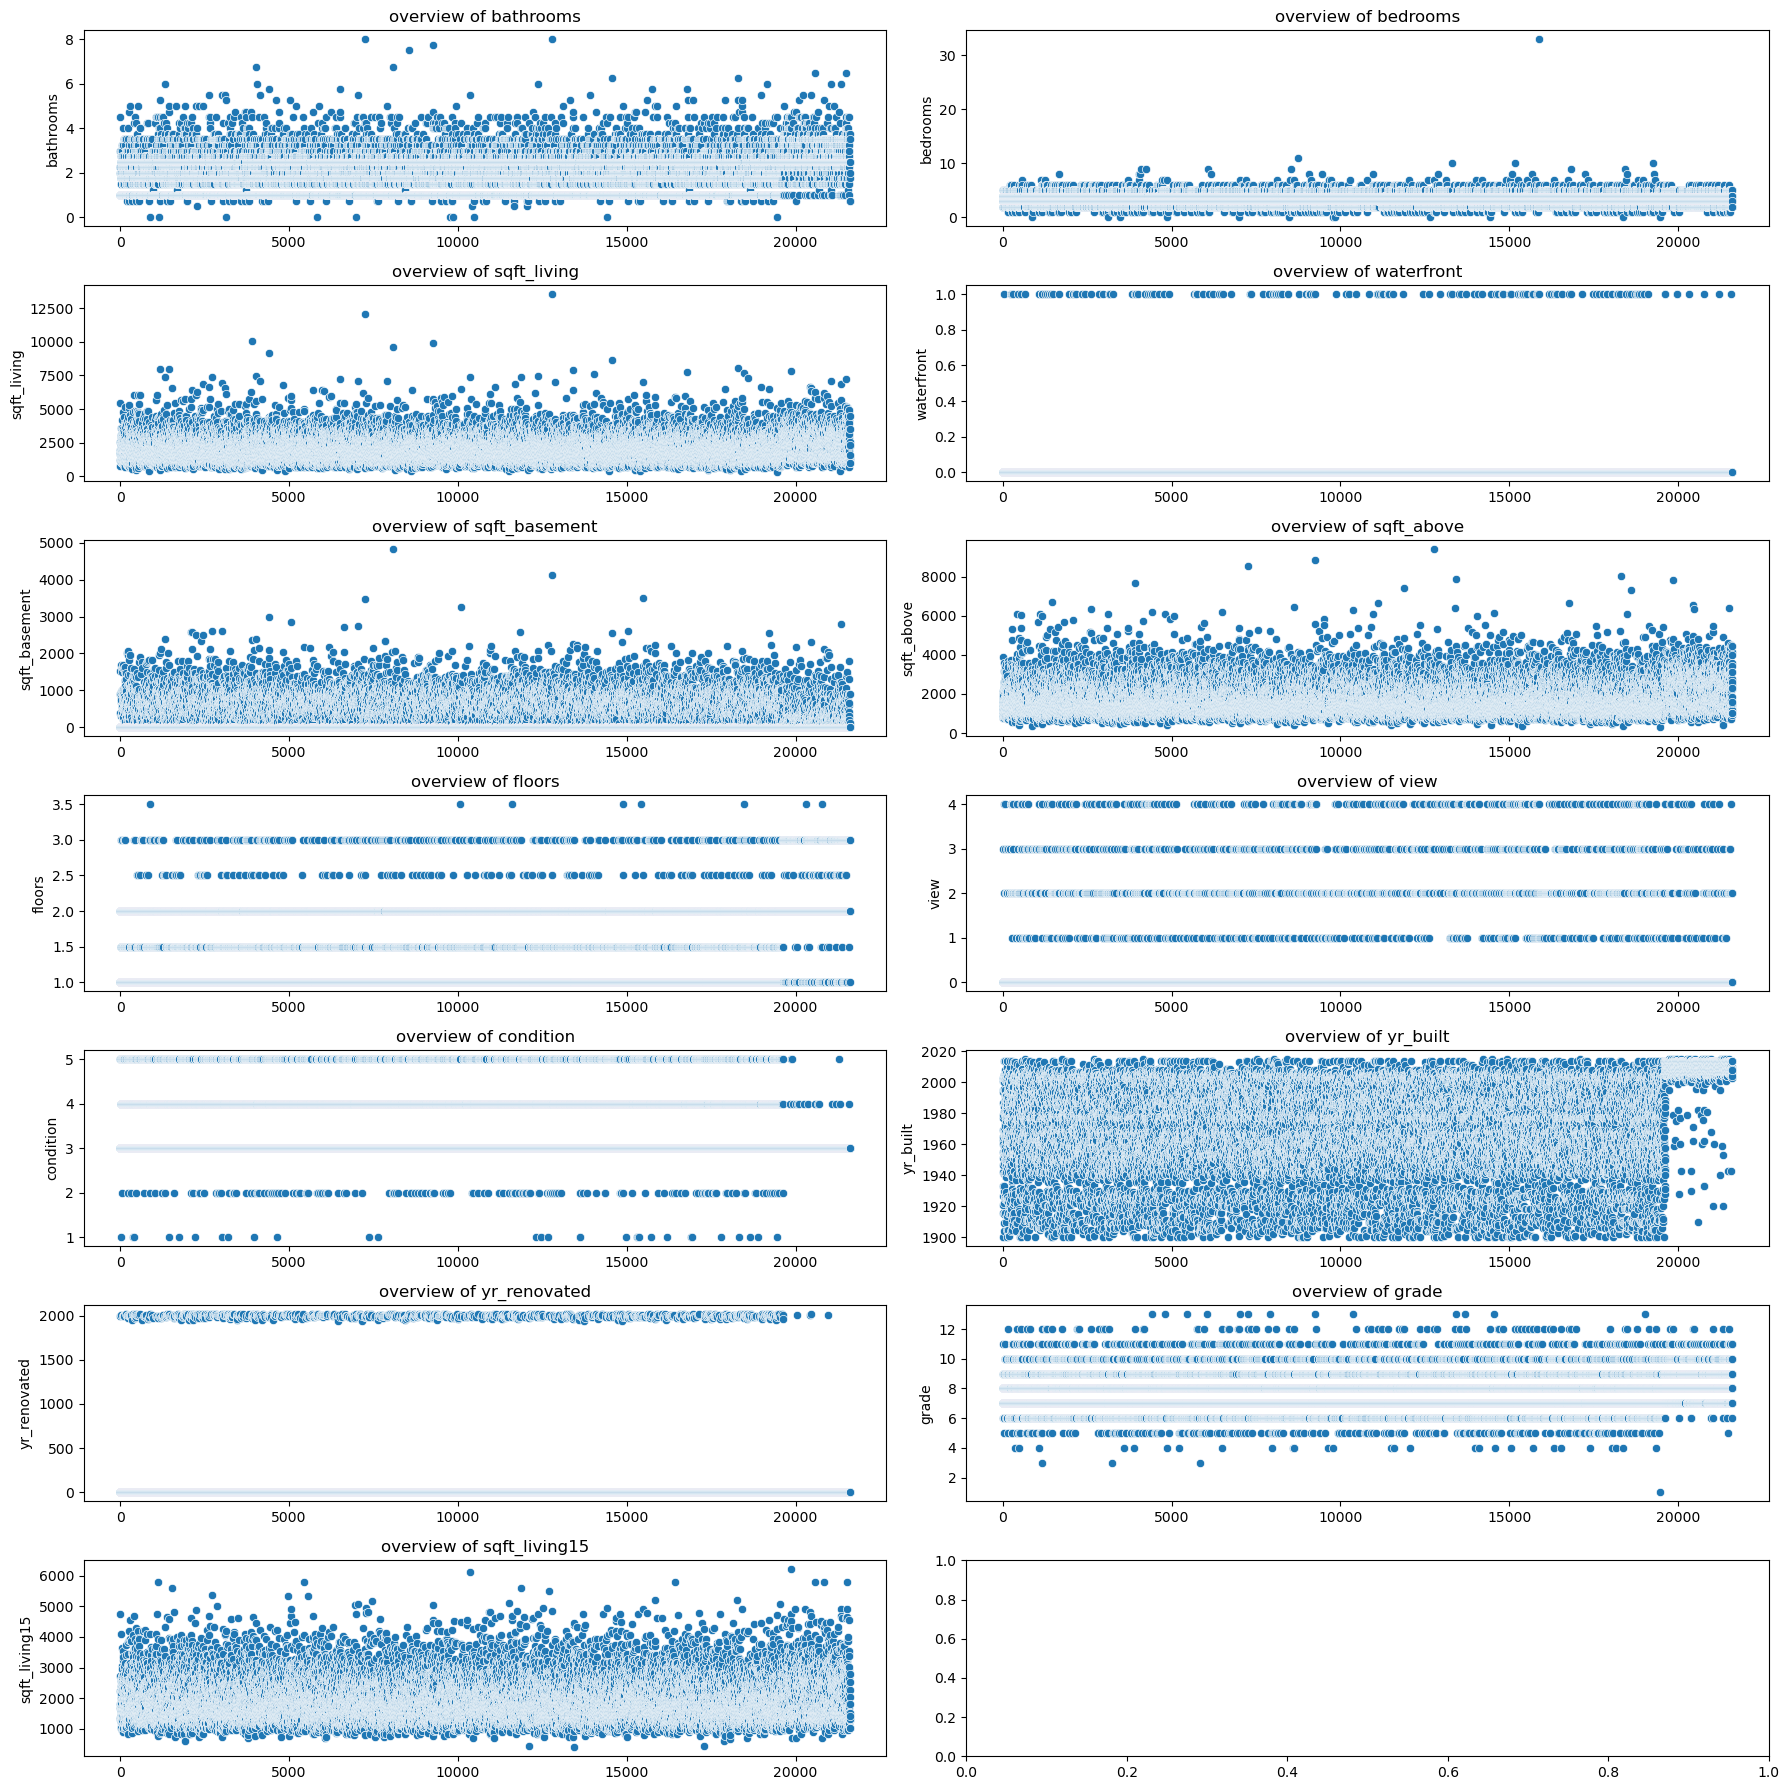

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

# Load data
raw_houseData = pd.read_csv('Rostyslav_Redchyts-Niels_Metselaar-data.csv')
houseData = raw_houseData.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'])

fig, axes = plt.subplots(7, 2, figsize=(18, 18))
ax = axes.flatten()
column_names = ['bathrooms', 'bedrooms', 'sqft_living', 'waterfront', 'sqft_basement',
                'sqft_above', 'floors', 'view', 'condition', 'yr_built', 'yr_renovated', 'grade', 'sqft_living15']

for i in range(len(column_names)):
    sns.scatterplot(houseData[column_names[i]], ax=ax[i])
    ax[i].set_title('overview of {}'.format(column_names[i]))

plt.tight_layout()

Outliers / Erroneous data

One property that seemed like an outlier initially, was a housing unit with 33 bedrooms sold for $640000. We discovered this property while performing an initial univariate plotting of the data in attempt to get a grasp of it.

<img src="33 bedrooms plot.png" alt="The plot of the bedrooms to price" width="1000"/>

It is evident from the plot that the outlier is significant and has to be addressed in some way.
The information about the location of the property revealed that it was located in the area from the screenshot below.

<img src="33 bedrooms property.png" alt="The general area of the 33 bedrooms property" width="1000"/>

Considering the fact that all the properties in this area are regular houses (as opposed to hotels or resorts) coupled with the data that the property only had one floor, we concluded that this entry must be erroneous. We attempted to find a specific property with the intention of finding out the actual number of bedrooms, but weren't able to achieve any conclusive result. Because of that, we decided to exclude it further on.


In [16]:
houseData.drop(index=houseData[raw_houseData['bedrooms'] == 33].index, inplace=True)
houseData.reset_index(drop=True, inplace=True)

#### Bivariate analysis

In addition to univariate analysis, we will also apply bivariate analysis. The bivariate analysis should help us discover more potential issues in our dataset.

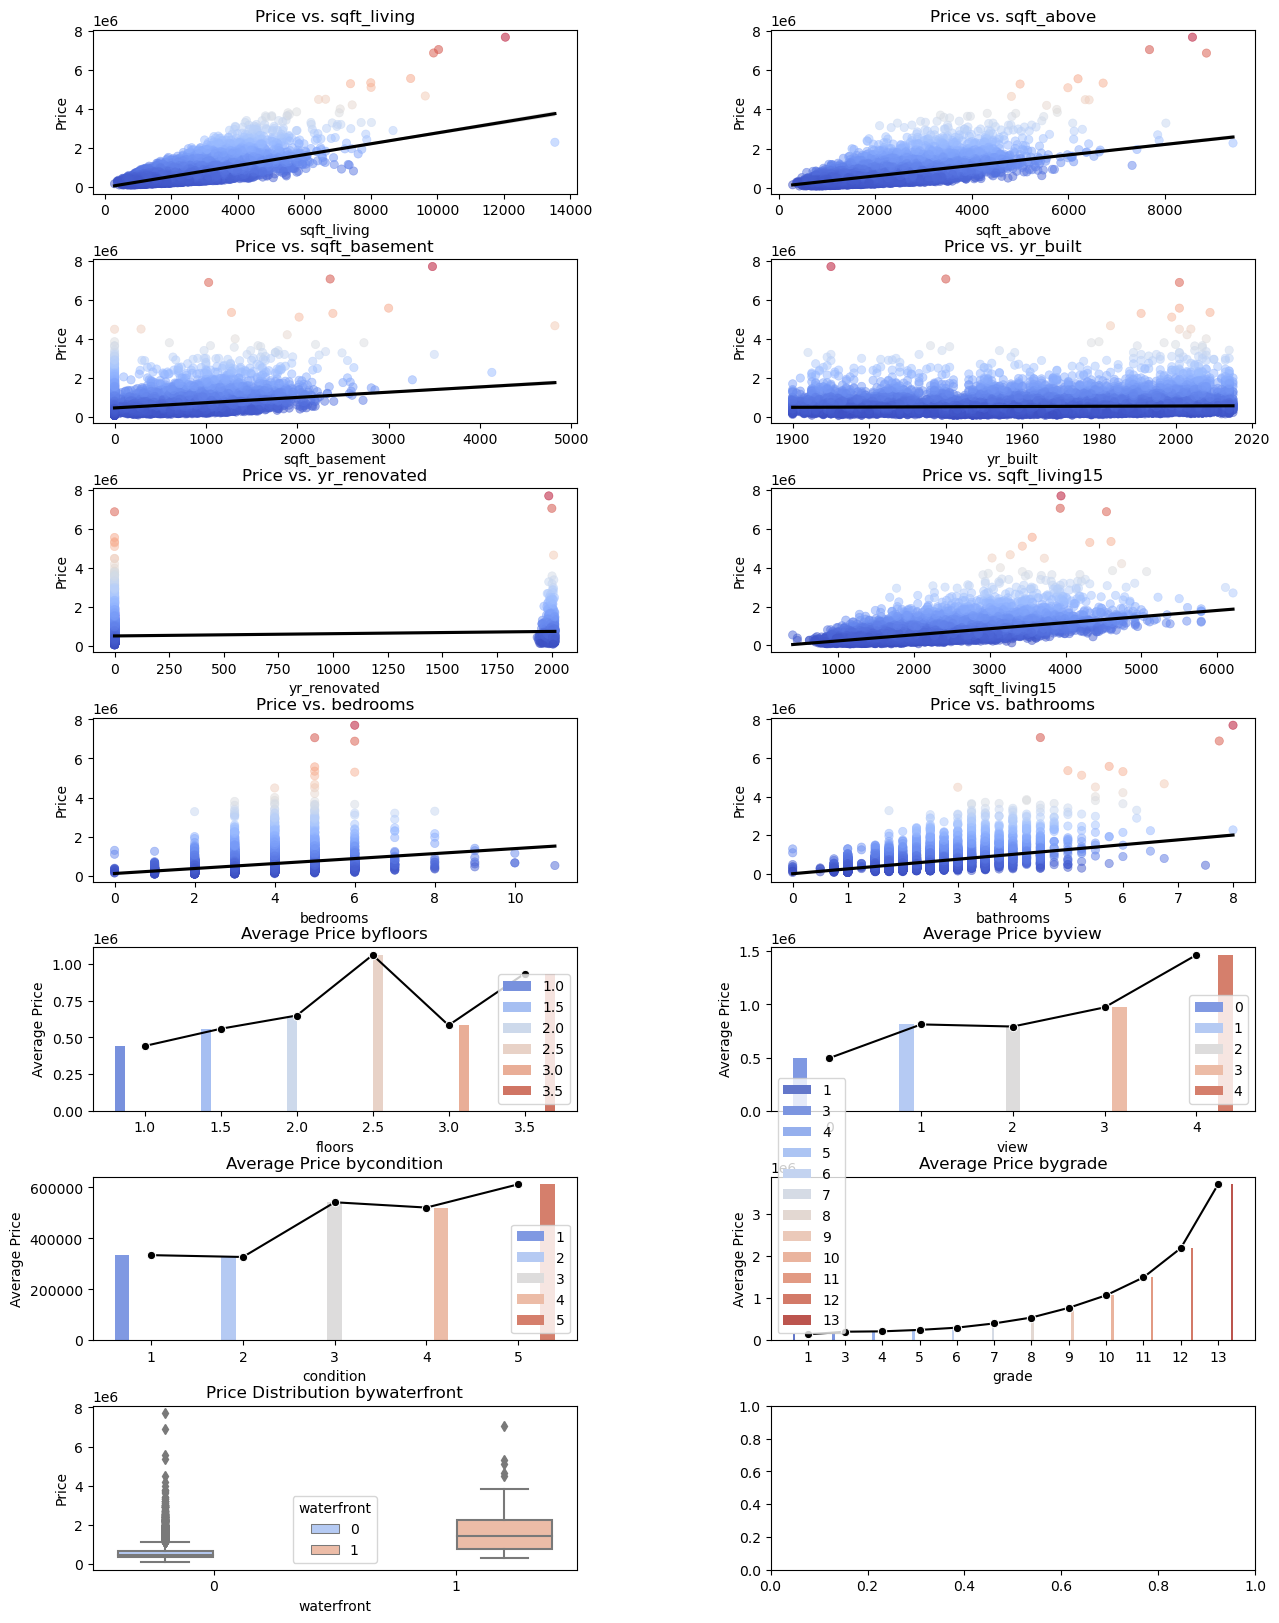

In [17]:
continuous_vars = ['sqft_living', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15', 'bedrooms', 'bathrooms']
categorical_vars = ['floors', 'view', 'condition', 'grade']
binary_vars = ['waterfront']

fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), gridspec_kw={'width_ratios': [1, 1]})
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

for i, var in enumerate(continuous_vars):
    sns.scatterplot(data=houseData, x=var, y='price', ax=axes[i], alpha=0.5, edgecolor=None,
                    hue='price', palette='coolwarm', legend=None)
    sns.regplot(data=houseData, x=var, y='price', ax=axes[i], scatter=False, color='black')
    axes[i].set_title(f'Price vs. {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Price')

for i, var in enumerate(categorical_vars):
    ax = axes[i + len(continuous_vars)]
    grouped_data = houseData.groupby(var)['price'].mean().sort_index()
    sns.barplot(x=grouped_data.index, y=grouped_data.values, hue=grouped_data.index, ax=ax, palette="coolwarm")
    sns.lineplot(x=np.arange(len(grouped_data)), y=grouped_data.values, ax=ax, color="black", marker="o")
    ax.set_title('Average Price by' + var)
    ax.set_xlabel(var)
    ax.set_ylabel('Average Price')

for i, var in enumerate(binary_vars):
    ax = axes[i + len(continuous_vars) + len(categorical_vars)]
    sns.boxplot(data=houseData, x=var, y='price', hue=var, ax=ax, palette="coolwarm")
    ax.set_title('Price Distribution by' + var)
    ax.set_xlabel(var)
    ax.set_ylabel('Price')

plt.show()


We can immediately identify a couple of issues with our data (bivariate plots have been made to better visualize the data):
1. It appears that for we have a disproportionately high number of properties with the value of sqft_basement equal to 0. That is expected considering that many properties simply do not have a basement.
![sqft_basement plot](basement%20plot.png)
2. We can see that the properties that were never renovated have the yr_renovated variable set to 0. We forsee it to have a significant negative influence on the predictive ability of our future model, since the model will see that the properties without the renovation are significantly far from the properties which were renovated, which is simply not true in real life.
![yr_renovated plot](yr_renovated%20plot.png)
3. We can also see that the relationships between certain explanatory variables (like bedrooms, floors and condition) and the response variable 'price' appear non-linear and can so the model might benefit from having a quadratic term for these variables

For square feet of basement we create a dummy variable. This dummy variable sqft_basement_dummy divides houses into 0 - doesn't have a basement and 1 - has a basement. Now the 2 groups, basement and no basement can be compared. The variable yr_renovated has also been manipulated Not all houses have been renovated and thus all the 0 values should be excluded from the data. To create the new data we take the current year (2024) and subtract the amount of years since the house underwent significant quality improvement. In case the house has been renovated the calculation would be year_renovated_dummy = current year - year renovated, and if the building has not been renovated year_renovated_dummy = current year - year built. The new yr_renovated_dummy variable has more use than the yr_renovated variable as it no longer includes any 0 values.

In [18]:
houseData['sqft_basement_dummy'] = (houseData['sqft_basement'] > 0).astype(int)

current_year = 2024
houseData['yr_renovated_dummy'] = np.where(houseData['yr_renovated'] == 0, current_year - houseData['yr_built'], current_year - houseData['yr_renovated'])

## Checking the assumptions for the multiple regression model

To improve the accuracy of our current model and ensure that our assumptions are met, we will perform several checks on the multiple regression model. The 4 tests that we will perform are:
1. Variablility of the residuals is nearly constant
2. Residuals of the model are nearly normal
3. Residuals are independent
4. Each variable is linearly related to the outcome

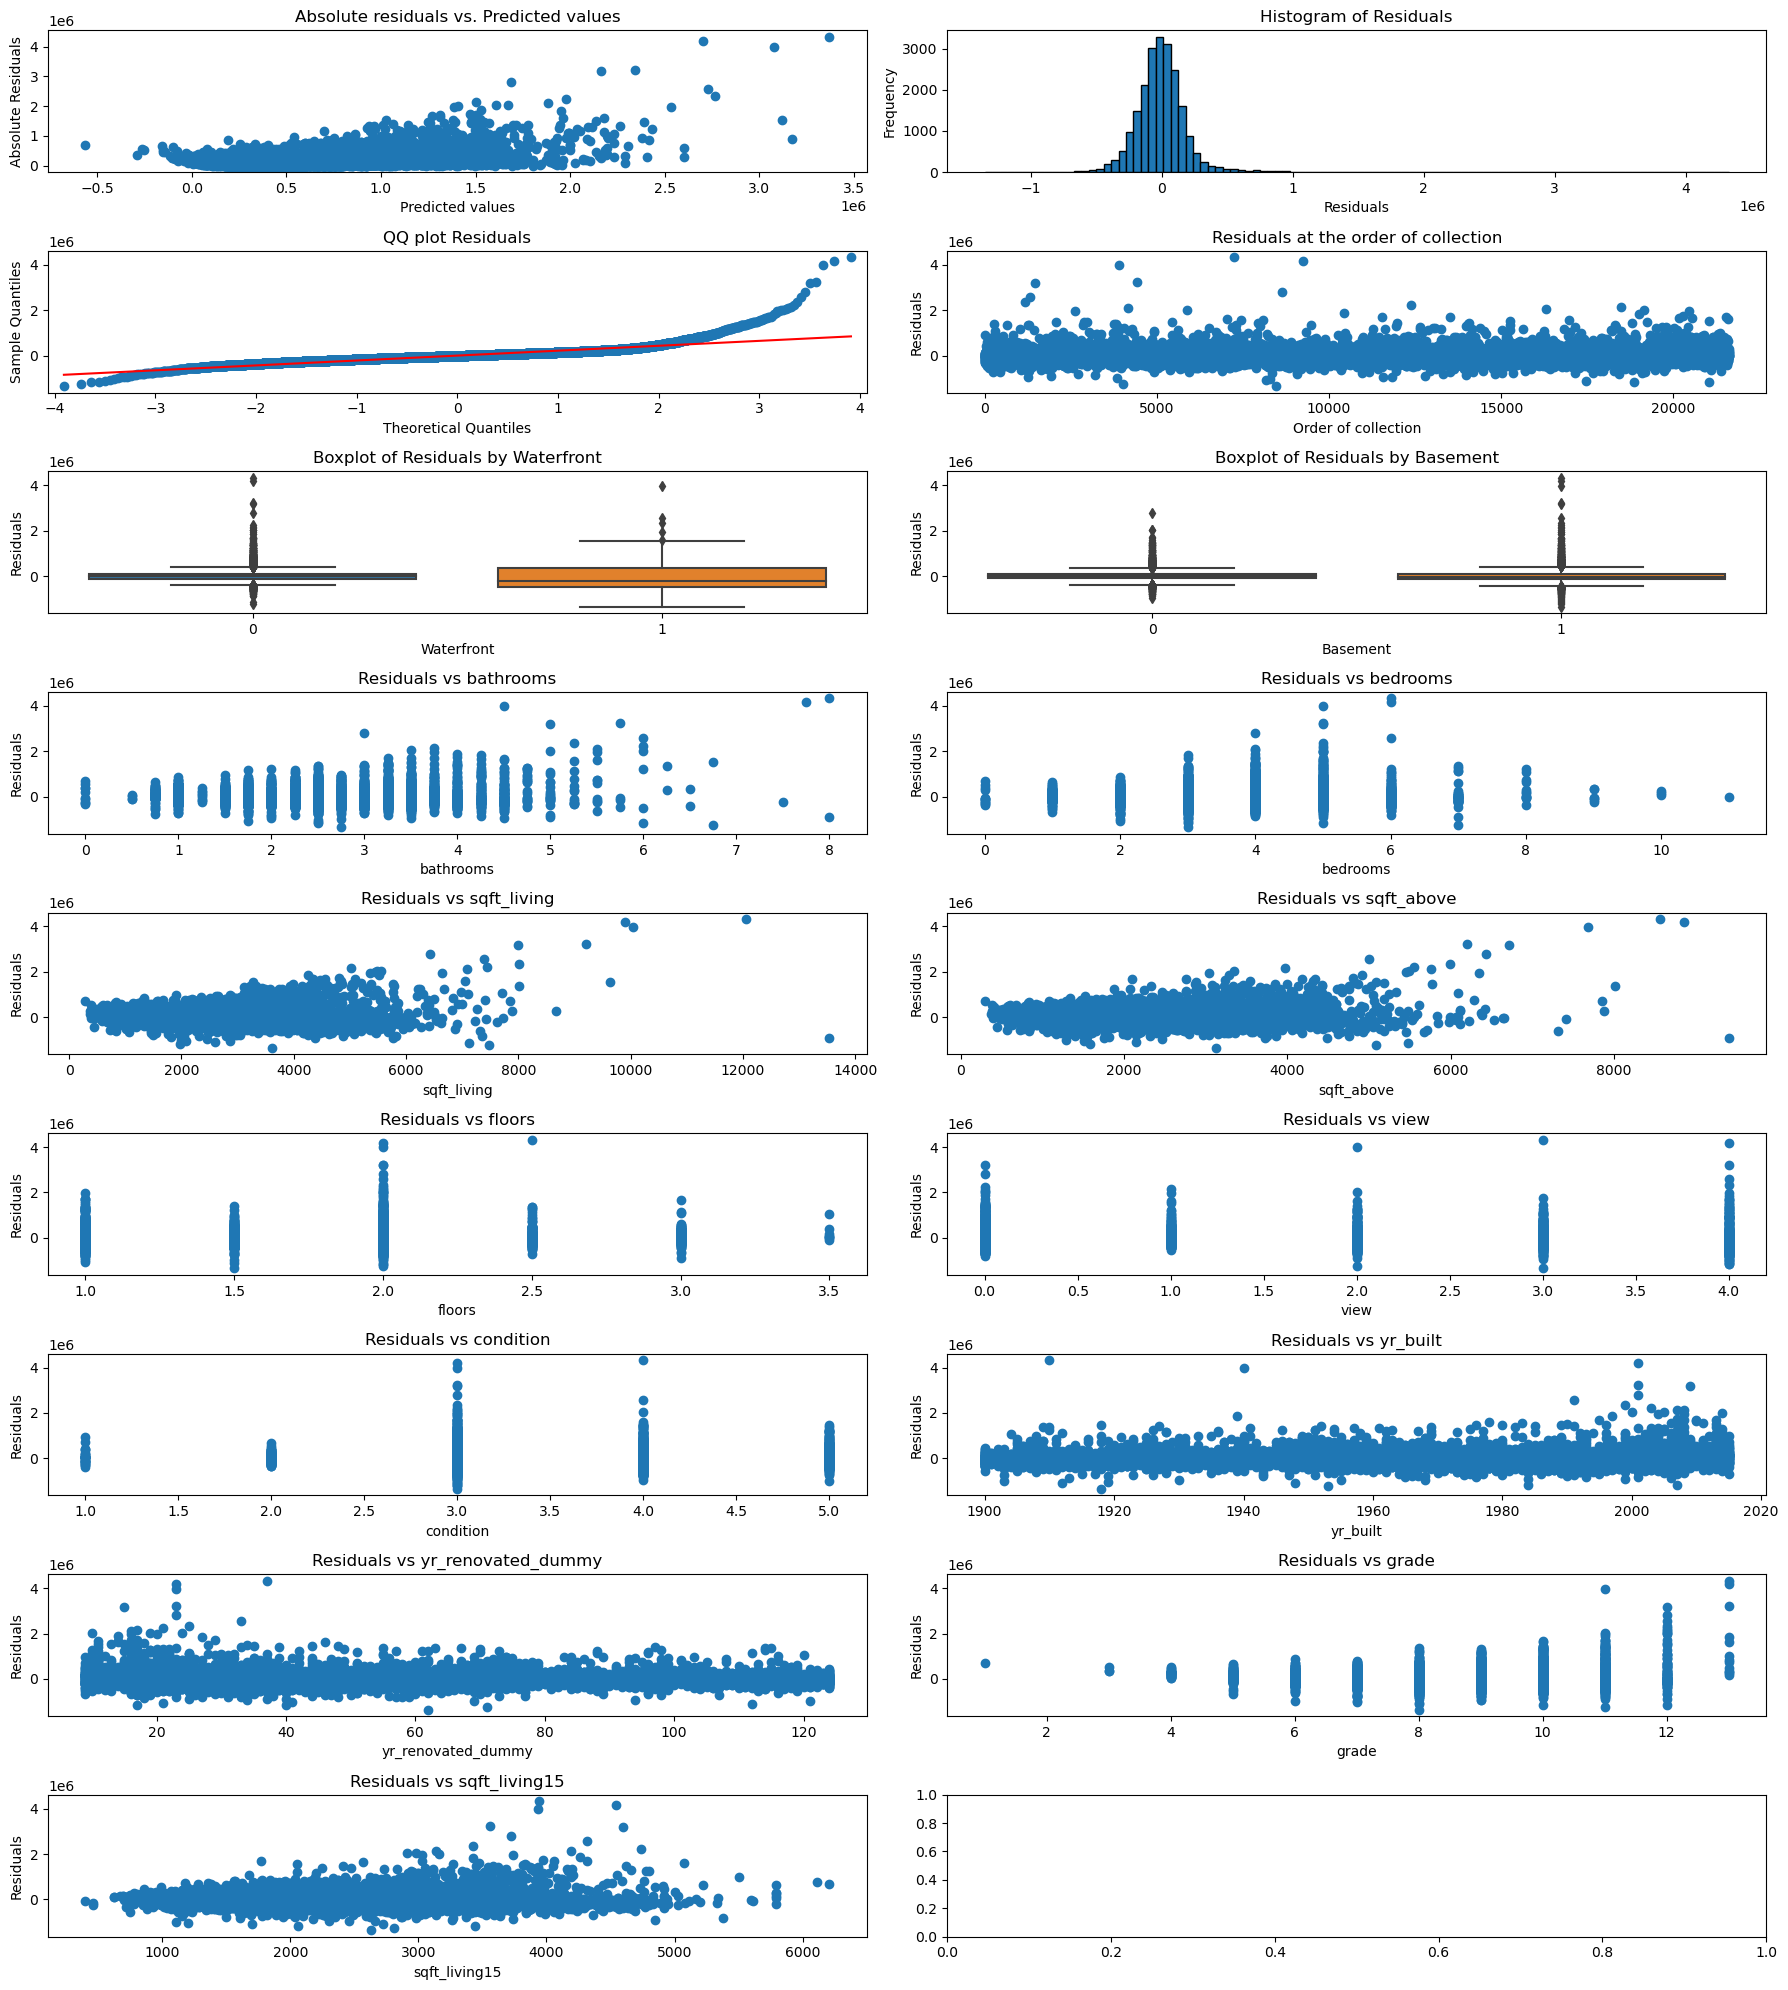

In [19]:
used_columns = ['bathrooms', 'bedrooms', 'sqft_living', 'waterfront', 'sqft_basement_dummy',
                'sqft_above', 'floors', 'view', 'condition', 'yr_built', 'yr_renovated_dummy', 'grade', 'sqft_living15']

formula = 'price ~ ' + ' + '.join(used_columns)

model = sm.formula.ols(formula=formula, data=houseData).fit()


predicted_score_values = model.params.iloc[0]
for i, val in enumerate(used_columns):
    predicted_score_values += model.params.iloc[i + 1] * houseData[val]
regular_residuals = houseData['price']-predicted_score_values
absolute_residuals = np.abs(regular_residuals)


def check_assumptions(rows, cols, variables, response, quad_variables=()):
    assumption_columns = variables
    assumption_formula = response + ' ~ ' + ' + '.join(assumption_columns)

    assumption_model = sm.formula.ols(formula=assumption_formula, data=houseData).fit()

    assumptions_predicted_score_values = assumption_model.params.iloc[0]
    params = assumption_model.params.index
    quadratic_indexes = []
    for i, param in enumerate(params):
        if 'squared' not in param:
            squared_term = f"{param}_squared"
            if squared_term in params:
                j = params.get_loc(squared_term)
                quadratic_indexes.append((i, j))

    for index, value in enumerate(assumption_columns):
        assumptions_predicted_score_values += assumption_model.params.iloc[index + 1] * houseData[value]
    
    for indexes, value in zip(quadratic_indexes, quad_variables):
        assumptions_predicted_score_values += assumption_model.params.iloc[indexes[0]] * houseData[value] + assumption_model.params.iloc[indexes[1]] * houseData[value] * houseData[value]
    
    assumption_regular_residuals = houseData[response] - assumptions_predicted_score_values
    assumption_absolute_residuals = np.abs(assumption_regular_residuals)

    fig, axes = plt.subplots(rows, cols, figsize = (18, 20))

    # Checking if variability of the residuals is nearly constant

    axes[0, 0].scatter(assumptions_predicted_score_values, assumption_absolute_residuals)
    axes[0, 0].set_title('Absolute residuals vs. Predicted values')
    axes[0, 0].set_xlabel('Predicted values')

    axes[0, 0].set_ylabel('Absolute Residuals')

    # Checking the normality of the residuals

    axes[0, 1].hist(assumption_regular_residuals, bins=100, edgecolor='k')
    axes[0, 1].set_title("Histogram of Residuals")
    axes[0, 1].set_xlabel('Residuals')
    axes[0, 1].set_ylabel('Frequency')

    sm.qqplot(assumption_regular_residuals, line='s', ax=axes[1, 0])
    axes[1, 0].set_title('QQ plot Residuals')

    # Checking if the residuals are independent

    axes[1, 1].scatter(np.arange(len(assumption_regular_residuals)), assumption_regular_residuals)
    axes[1, 1].set_title('Residuals at the order of collection')
    axes[1, 1].set_xlabel('Order of collection')
    axes[1, 1].set_ylabel('Residuals')
    
    sns.boxplot(x='waterfront', y=assumption_regular_residuals, data=houseData, ax=axes[2, 0])
    axes[2, 0].set_title('Boxplot of Residuals by Waterfront')
    axes[2, 0].set_xlabel('Waterfront')
    axes[2, 0].set_ylabel('Residuals')

    sns.boxplot(x='sqft_basement_dummy', y=assumption_regular_residuals, data=houseData, ax=axes[2, 1])
    axes[2, 1].set_title('Boxplot of Residuals by Basement')
    axes[2, 1].set_xlabel('Basement')
    axes[2, 1].set_ylabel('Residuals')
    
    #Checking if each variable is linearly related to the outcome

    row, col = 3, 0
    temp = assumption_columns.copy()
    temp.remove('waterfront')
    temp.remove('sqft_basement_dummy')
    temp+=quad_variables
    for var in temp:
        if col == 2:
            row += 1
            col = 0
        axes[row, col].scatter(houseData[var], assumption_regular_residuals)
        axes[row, col].set_title(f'Residuals vs {var}')
        axes[row, col].set_xlabel(var)
        axes[row, col].set_ylabel('Residuals')
        col += 1



    plt.tight_layout()
    plt.show()


check_assumptions(9, 2, used_columns, 'price')


To account for the non-normal distribution of the data(as seen in the third plot) a log transformation has been applied to the price variable. Taking the log of the data ensures that the distribution will be more symmetric by stabilizing the variance across the range of values. The data will now resemble a normal distribution.

In [20]:
houseData['log_price'] = np.log(houseData['price'])

We can once again see that the residuals for the condition, bedrooms and floors are non-linear. We will solve this issue by applying a quadratic transformation to them. With that, our new formula becomes:

In [21]:
formula = ('log_price ~ bathrooms + bedrooms + I(bedrooms ** 2) + sqft_living + sqft_basement_dummy + '
           'sqft_above + floors + I(floors ** 2) + view + condition + I(condition ** 2) + yr_built + '
           'yr_renovated_dummy + grade + sqft_living15 + sqft_lot15 + waterfront')

## Fitting the multiple regression model

In order to fit a multiple regression model, a custom function was built. This function takes 6 arguments: data, columns, response, forward, use_p, where 'data' corresponds to the database containing all the data, 'columns' corresponds to the list of columns in the data that we want to use, 'response' is the name of the column that we choose as our response variable, and 'forward' and 'use_p' are flag arguments that decide what kind of regression we want to perform.
    forward = True and use_p = True - Forward selection using the p-value
    forward = False and use_p = True - Backward elimination using the p-value
    forward = True and use_p = False - Forward selection using the adjusted R^2 value
    forward = False and use_p = False - Backward elimination using the adjusted R^2 value

We run the function for all 4 combination of the flag arguments and look at the results in the next section.


In [22]:
column_names = ['bathrooms', 'bedrooms', 'I(bedrooms ** 2)', 'sqft_living', 'sqft_basement_dummy',
                'sqft_above', 'floors', 'I(floors ** 2)', 'view', 'condition', 'I(condition ** 2)',
                'yr_built', 'yr_renovated_dummy', 'grade', 'sqft_living15', 'waterfront']

def stepwise_regression(data, columns, response, forward=True, use_p=True):
    def construct_formula(rem_c, used_c, current_c=''):
        if forward:
            if used_c:
                return response + " ~ " + " + ".join(used_c) + " + " + current_c
            else:
                return response + " ~ " + current_c
        else:
            if use_p:
                return response + " ~ " + " + ".join(rem_c)
            else:
                rem_c.remove(current_c)
                return response + " ~ " + " + ".join(rem_c)

    def evaluate_change(current_formula, c):
        fitted_model = sm.formula.ols(formula=current_formula, data=data).fit()
        if use_p:
            return fitted_model.pvalues[c]
        else:
            return fitted_model.rsquared_adj

    print("MODE: ", ("Backward", "Forward")[int(forward)], ("Adj. R^2", "p-value")[use_p])

    optimal_flag = False

    remaining_columns = columns.copy()
    used_columns = list()

    if not forward:
        prev_best_assessment = sm.formula.ols(formula=response + " ~ " + " + ".join(remaining_columns),
                                              data=data).fit().rsquared_adj
    else:
        prev_best_assessment = 0

    while not optimal_flag and remaining_columns:
        results = dict()

        for column in remaining_columns:
            temp_remaining_columns = remaining_columns.copy()
            temp_remaining_columns.remove(column)

            temp_formula = construct_formula(remaining_columns.copy(), used_columns, column)
            temp_assessment = evaluate_change(temp_formula, column)
            results[column] = temp_assessment

        min_fit = (min(results, key=results.get), results[min(results, key=results.get)])

        max_fit = (max(results, key=results.get), results[max(results, key=results.get)])


        if forward and use_p:
            if min_fit[1] < 0.05:
                used_columns.append(min_fit[0])
                remaining_columns.remove(min_fit[0])
            else:
                optimal_flag = True
        elif forward and (not use_p):
            if max_fit[1] >= prev_best_assessment:
                used_columns.append(max_fit[0])
                remaining_columns.remove(max_fit[0])
                prev_best_assessment = max_fit[1]
            else:
                optimal_flag = True
        elif (not forward) and use_p:
            if max_fit[1] > 0.05:
                remaining_columns.remove(max_fit[0])
            else:
                optimal_flag = True
        elif (not forward) and (not use_p):
            if max_fit[1] > prev_best_assessment:
                remaining_columns.remove(max_fit[0])
                prev_best_assessment = max_fit[1]
            else:
                optimal_flag = True

    if forward:
        return used_columns
    else:
        return remaining_columns

forward_p = stepwise_regression(houseData, column_names, "log_price", True, True)
forward_adj_r2 = stepwise_regression(houseData, column_names, "log_price", True, False)
backward_p = stepwise_regression(houseData, column_names, "log_price", False, True)
backward_adj_r2 = stepwise_regression(houseData, column_names, "log_price", False, False)

print(
    "Forward p-values: \n\t" + str(forward_p) + "\n" +
    "Forward Adjusted R^2: \n\t" + str(forward_adj_r2) + "\n" +
    "Backward p-values: \n\t" + str(backward_p) + "\n" +
    "Backward Adjusted R^2: \n\t" + str(backward_adj_r2)
)

MODE:  Forward p-value
MODE:  Forward Adj. R^2
MODE:  Backward p-value
MODE:  Backward Adj. R^2
Forward p-values: 
	['bathrooms', 'sqft_living', 'yr_built', 'grade', 'view', 'I(floors ** 2)', 'sqft_living15', 'sqft_basement_dummy', 'waterfront', 'condition', 'bedrooms', 'sqft_above', 'I(bedrooms ** 2)', 'floors']
Forward Adjusted R^2: 
	['grade', 'yr_built', 'sqft_living', 'view', 'I(floors ** 2)', 'sqft_basement_dummy', 'sqft_living15', 'waterfront', 'bathrooms', 'condition', 'bedrooms', 'sqft_above', 'I(bedrooms ** 2)', 'floors', 'yr_renovated_dummy']
Backward p-values: 
	['bathrooms', 'bedrooms', 'I(bedrooms ** 2)', 'sqft_living', 'sqft_basement_dummy', 'sqft_above', 'floors', 'I(floors ** 2)', 'view', 'condition', 'yr_built', 'grade', 'sqft_living15', 'waterfront']
Backward Adjusted R^2: 
	['bathrooms', 'bedrooms', 'I(bedrooms ** 2)', 'sqft_living', 'sqft_basement_dummy', 'sqft_above', 'floors', 'I(floors ** 2)', 'view', 'condition', 'yr_built', 'yr_renovated_dummy', 'grade', 'sqft

As we can see, the deciding factor on which variables were chosen for the model was the criteria, on which the variables were assessed (p-value of the variable vs Adj. R^2 resulting from adding/eliminating the variable) rather than the direction in which the variables were chosen (forward selection vs backward elimination). That is concluded based on the fact that using p-values results in the same set of variables, regardless of the choice between the forward selection and backwards elimination. The same can be said about the other two modes.
We have also found that the squared term for condition was, in fact, not significant, so we we will not be applying the transformation for the condition further on.
For our purposes, we decided to choose the variables that resulted from using the p-values. That is because in our research we are not interested in predicting the housing prices (since our data comes from around 10 years ago), but rather understanding how significant certain factors were at influencing the price of the housing at the time.

In [23]:
updated_formula = 'log_price ~ ' + ' + '.join(forward_p)
model = sm.formula.ols(formula=updated_formula, data=houseData).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2984.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:48:18   Log-Likelihood:                -5177.0
No. Observations:               21612   AIC:                         1.038e+04
Df Residuals:                   21597   BIC:                         1.050e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              21.5536    

Now, as we modified our variables, let us examine if the regression assumptions hold now.

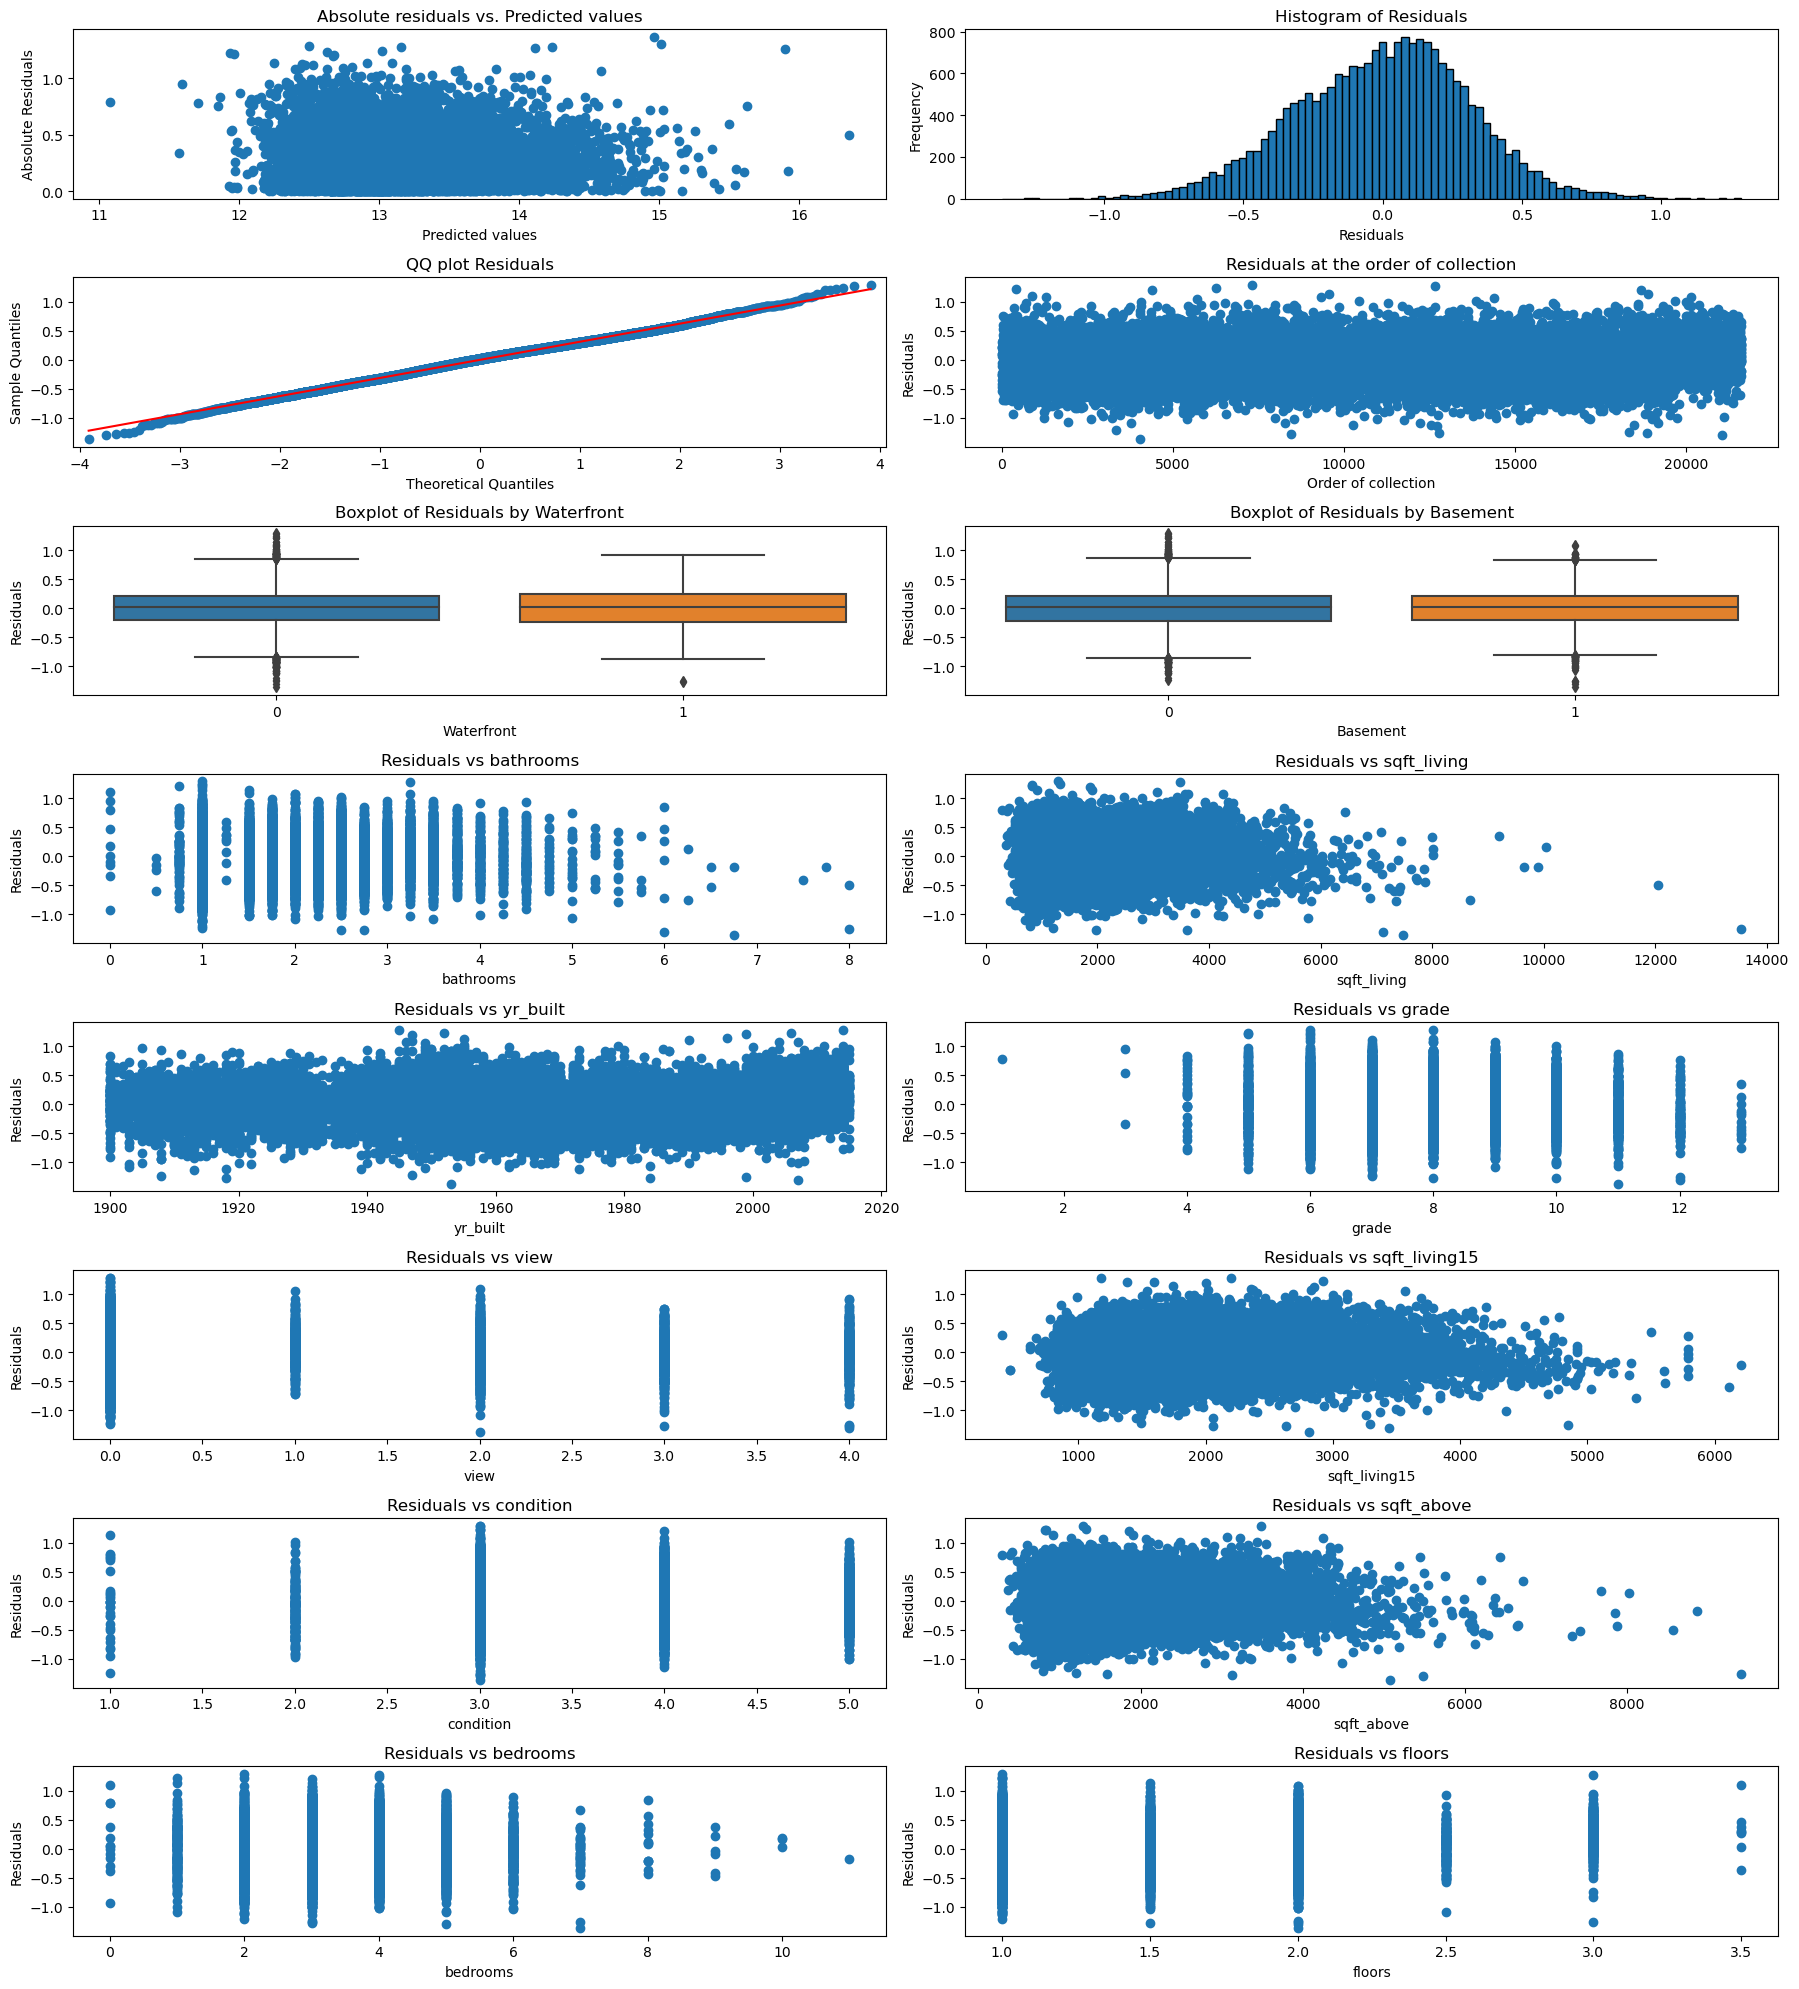

In [24]:
modified_formula = 'log_price ~ ' + ' + '.join(forward_p)

model = sm.formula.ols(formula=modified_formula, data=houseData).fit()

updated_regular_columns = forward_p.copy()
updated_regular_columns.remove('I(floors ** 2)')
updated_regular_columns.remove('I(bedrooms ** 2)')
floor_index = 0
bedrooms_index = 0
predicted_score_values = model.params.iloc[0]
for i, val in enumerate(updated_regular_columns):
    if val == 'floors':
        floor_index = i + 1
    elif val == 'bedrooms':
        bedrooms_index = i + 1
    predicted_score_values += model.params.iloc[i + 1] * houseData[val]

predicted_score_values += model.params.iloc[floor_index] * houseData['floors'] + model.params.iloc[bedrooms_index] * houseData['bedrooms']

regular_residuals = houseData['log_price']-predicted_score_values
absolute_residuals = np.abs(regular_residuals)

regular_columns = []
squared_columns = []
for i in forward_p:
    if f'I({i} ** 2)' not in forward_p and "**" not in i:
        regular_columns.append(i)
    elif "**" not in i:
        squared_columns.append(i)

check_assumptions(8, 2, regular_columns, 'log_price', quad_variables=squared_columns)



As we can see, the residuals for the bedrooms and floors are more linear than they were before. The response variable, price is also more linearly distributed, as evident from the updated qq-plot.

We will now once again take a look at our final model.

In [25]:
final_formula = ('log_price ~ bathrooms + bedrooms + I(bedrooms ** 2) + sqft_living + sqft_basement_dummy + '
           'sqft_above + floors + I(floors ** 2) + view + condition + yr_built + '
           'grade + sqft_living15 + sqft_lot15 + waterfront')
model = sm.formula.ols(formula=final_formula, data=houseData).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2787.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:48:22   Log-Likelihood:                -5171.4
No. Observations:               21612   AIC:                         1.037e+04
Df Residuals:                   21596   BIC:                         1.050e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              21.5273    

Since we applied a logarithmic transformation onto our response variable, we cannot make the statement "an increase of a number of bathrooms in 1 is associated in increase of a price by $x", or any similair statment of that type. Instead of that, we can deduct the following:

of the model is of the following kind:
coeff_1 * x + coeff_2 * y + ... = ln(price)
This would mean that an increase of x by 1 is associated with an increase of logarithmic price by coeff_1.
In other words,
x + 1 -> ln(price) + coeff
we can modify this expression as follows:
ln(price) + coeff = ln(price) + ln(e^coeff) = ln(price * e ^ coeff)
Now, we can see that an increase of x by 1 is associated with the actual price changing in e ^ coeff times, or by (e ^ coeff - 1) * 100 percent. 

For varaibles that include a squared term the model gets more complex. We will have to make some extra steps for a model based on variables with squared terms.
coeff_1 * x + coeff_2 * x^2 = ln(price), and increase of x by 1 would mean
coeff_1 * (x+1) + coeff_2 * (x+1) ^ 2 = coeff_1 * x + coeff_1 + coeff_2 * (x^2 + 2x + 1) =
= coeff_1 * x + coeff_1 + coeff_2 * x^2 + coeff_2 * (2x + 1) =
= (coeff_1 * x + coeff_2 * x^2) + (coeff_1 * coeff_2 * (2x + 1))
In other words,
x + 1 -> ln(price) + coeff_1 * coeff_2 * (2x + 1)
We can now rewrite the expression
ln(price) + coeff_1 + coeff_2 * (2x + 1) =
= ln(pirce) + ln(e^coeff_1) + ln(e^(coeff_2 * (2x + 1))) =
= ln(price * e ^ coeff_1 * e ^ (coeff_2 * (2x + 1))) =
= ln(price * e ^ (coeff_1 + 2 * coeff_2 + coeff_2))
We can now see that an increase of x by 1 is associated with the price changing in e ^ (coeff_1 + 2 * coeff_2 + coeff_2) times or in
(e ^ (coeff_1 * coeff_2 * (2x + 1)) - 1) * 100 percent.
Using this formula, we can now calculate how each coefficient affects the percentage of change of the final price.

We will begin by calculating the percentage change for the non-transformed variables. While doing this we will ignore the intercept since almost all the variables in our model cannot be equal to 0 in the real world.

In [26]:
params = dict(model.params)

simple_params = params.copy()
simple_params.pop('Intercept')
simple_params.pop('bedrooms')
simple_params.pop('I(bedrooms ** 2)')
simple_params.pop('floors')
simple_params.pop('I(floors ** 2)')


for key, value in simple_params.items():
    percentage_change = round((np.exp(value) - 1) * 100, 3)
    coefficient_info = 'coefficient name: ' + key
    change_info = 'change in % per changing x by 1: ' + str(percentage_change)
    print(f"{coefficient_info:<39}{change_info}%")

coefficient name: bathrooms            change in % per changing x by 1: 7.531%
coefficient name: sqft_living          change in % per changing x by 1: 0.007%
coefficient name: sqft_basement_dummy  change in % per changing x by 1: 13.896%
coefficient name: sqft_above           change in % per changing x by 1: 0.006%
coefficient name: view                 change in % per changing x by 1: 3.949%
coefficient name: condition            change in % per changing x by 1: 4.53%
coefficient name: yr_built             change in % per changing x by 1: -0.545%
coefficient name: grade                change in % per changing x by 1: 22.278%
coefficient name: sqft_living15        change in % per changing x by 1: 0.012%
coefficient name: sqft_lot15           change in % per changing x by 1: -0.0%
coefficient name: waterfront           change in % per changing x by 1: 43.405%


As we can see, the most influential factors per changing the variable by 1 are:
waterfront - having a view of the waterfront from your house is associated with the increase of the price of the property by 43%, keeping all other variables the same
grade - increasing the grade by one is associated with the increase of the price of the property by 22%
sqft_basement_dummy - having a basement on your property is associated with the increase of the price of the property of 14%

This doesn ot mean that those factors are the most influential by themselves. In other words, it is expected that having a grade increased by a single unit has more influence on the total price, compared to increasing the square footage by a single unit.

Now, we will investigate the variables, to which a quadratic transformation has been applied. Namely, 'bedrooms' and 'floors'. For these variables, the change in percentage will depend on the specific value of the corresponding variable. To approach this issue, a function has been developed that plots the change of price in % against a value of x.

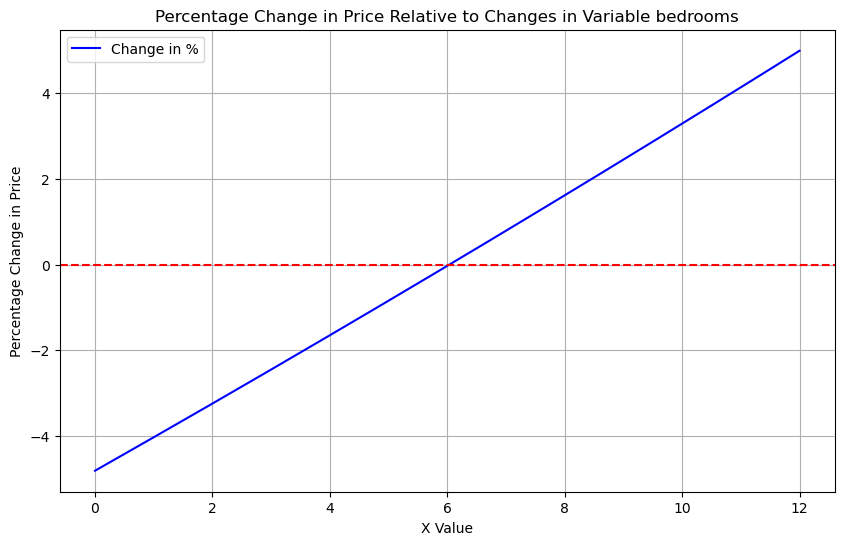

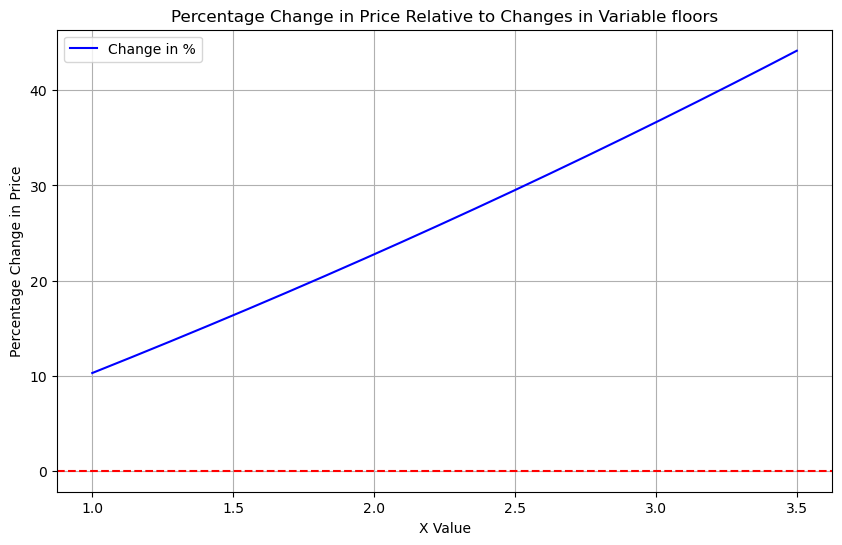

In [27]:
def plot_percentage_change(coeff_non_squared, coeff_squared, x_range, variable):
    x_values = np.linspace(x_range[0], x_range[1], 400)
    change_percentage = np.exp(coeff_non_squared + 2 * coeff_squared * x_values + coeff_squared) - 1

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, change_percentage * 100, label='Change in %', color='blue')
    plt.title('Percentage Change in Price Relative to Changes in Variable ' + variable)
    plt.xlabel('X Value')
    plt.ylabel('Percentage Change in Price')
    plt.axhline(0, color='red', linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_percentage_change(params['bedrooms'], params['I(bedrooms ** 2)'], (0, 12), 'bedrooms')
plot_percentage_change(params['floors'], params['I(floors ** 2)'], (1, 3.5), 'floors')


as seen above, an increase of the number of bedrooms by one unit can influence the total price by a range of around (-5 to 5) percent, depending on the actual number of bedrooms. Surprisingly, this results means that increasing the number of bedrooms will actually be decreasing the overall price of the property until you reach the threshold of 6 beds, where increasing the number of beds starts to increase the price of the property.

An increase of the number of floors by one unit is associated with the increase the price of the property at anywhere from 10% to 40%.

This data, however, is not sufficient to understand which factors have the most influence on the price of the housing property. In order to calculate which of these factors are most influential for the overall price of housing properties, A standardization of our explanatory variables will be performed. That way, one unit for every variable would be equal in a change in one standard deviation of this variable, which will allow us to compare the results fairly.

In [28]:
continuous_vars = ['bathrooms', 'bedrooms', 'sqft_living', 'sqft_above', 'floors', 'view', 'condition', 'yr_built', 
                   'grade', 'sqft_living15', 'sqft_lot15']

scaler = StandardScaler()
houseData[continuous_vars] = scaler.fit_transform(houseData[continuous_vars])

final_formula = ('log_price ~ bathrooms + bedrooms + I(bedrooms ** 2) + sqft_living + sqft_basement_dummy + '
                 'sqft_above + floors + I(floors ** 2) + view + condition + yr_built + '
                 'grade + sqft_living15 + sqft_lot15 + waterfront')

model = smf.ols(formula=final_formula, data=houseData).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     2787.
Date:                Fri, 21 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:48:23   Log-Likelihood:                -5171.4
No. Observations:               21612   AIC:                         1.037e+04
Df Residuals:                   21596   BIC:                         1.050e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.9750    

We can now see that the most influential variables for predicting the housing prices (with respect to the order) are:
waterfront,
grade,
yr_built,
sqft_basement_dummy

## Results

Since we applied a logarithmic transformation to our response variable (price), we cannot directly state the effect of changes in predictor variables in dollar terms. Instead, we interpret the coefficients in terms of percentage changes.

For a model of the form:
coeff1⋅x+coeff2⋅y+…=ln⁡(price)
an increase in x by 1 unit results in an increase in the logarithm of price by coeff1​. This can be rewritten as:
ln⁡(price)+coeff1=ln⁡(price⋅e^coeff1)
Thus, an increase of x by 1 is associated with the price changing by e^coeff1​ times or (e^coeff1−1)×100%.

For variables with squared terms, the interpretation is slightly more complex. For a model of the form:
coeff1⋅x+coeff2⋅x2=ln⁡(price)
an increase in x by 1 unit results in:
coeff1⋅(x+1)+coeff2⋅(x+1)2=coeff1⋅x+coeff2⋅x2+coeff1+coeff2⋅(2x+1)
This can be simplified and expressed as:
ln⁡(price⋅e^(coeff1+2⋅coeff2⋅x+coeff2))

The linear equation derived from the model is:
ln⁡(price)=12.9750+0.0559⋅bathrooms−0.0235⋅bedrooms+0.0034⋅bedrooms2+0.0677⋅sqft_living+0.1301⋅sqft_basement_dummy+0.0460⋅sqft_above+0.0525⋅floors+0.0156⋅floors2+0.0297⋅view+0.0288⋅condition−0.14837⋅yr_built
+0.2667⋅grade+0.08251⋅sqft_living15−0.00728⋅sqft_lot15+0.43405⋅waterfront

The analysis shows that having a waterfront view increases property prices by 43%, increasing the year built of a property by 1 year is associated with a decrease in property prices by approximately 13.9%, an increase in grade by one unit raises prices by 26.67%, and having a basement is associated with a 13.9% increase in property prices. For variables with quadratic terms, the effect on price changes depends on the specific value of the variable. For example, increasing the number of bedrooms initially decreases the property price until reaching a threshold, beyond which further increases raise the price. An additional floor is associated with a price increase of 10% to 40%.

To identify the most influential factors, we standardized the explanatory variables. The most influential variables for predicting housing prices were found to be waterfront, grade, year built, floors and basement dummy.

The R^2 adjusted value is 0.659, meaning that the correlation between the selected explanatory variables and the response variable was moderate to strong.


## Conclusion

With the help of the multiple regression model, the alternative hypothesis: The number of bathrooms and bedrooms, living space square footage, basement presence, total area above ground, number of floors in the house, view quality, house condition, the year it was constructed, the number of years since it was renovated, and the grade of the building’s construction and design can predict housing prices, can be answered.
To fit the multiple regression model, we utilized a custom function that performs forward selection or backward elimination based on either p-value or adjusted R² value. We decided to apply backward elimination based on p-value to determine the most significant predictors. Our model identified several key predictors of housing prices.

From these key predictors, we determined the following:

Waterfront: Having a waterfront view increases property prices by 43%.

year_built: an icrease in year built by one unit decreases the property price by 13.9%

Grade: An increase in grade by one unit raises prices by 26.67%.

Basement: Having a basement is associated with a 13.9% increase in property prices.

Floors: Adding a floor is associated with a 10% to 40% increase in property prices.

With this research we have increased the clarity about the property prices in King County area between 2014 and 2015. homeowners and potential home buyers aswell as policymakers and urban planners. Can take these factors into consideration to better understanding what drives housing prices in the king county region of Washington.
    
#### Limitations 

The dataset itself did not include any missing values. We did initially exclude 5 of the columns from our dataset. These columns are; id, date, zipcode, latitude and longitude. id, date and zipcode. Although we excluded these variables because we decided that they would not result in any interesting findings. An argument could be made that these explanatory variables should have been included. The latitude and longitude variables could have had a substantial impact on the overall results, as longitude and latitude are closely linked with temperature changes, distance from landmarks (e.g. cities, forests, bodies of water). 

several other limitations that should be noted:

Generalizability: Our findings are specific to King County, Washington, for the years 2014-2015 and may not be applicable to other regions or time periods.

Unobserved Variables: There may be other influential factors that decide housing price, not included in the dataset, such as neighborhood, crime rate, access to public transport or school quality.

Data Quality: The dataset's accuracy could not be independently verified, and any error or bias in the data coming from the dataset could affect our final model results.

To improve the model, future research could incorporate additional variables, explore non-linear models, and use data from multiple regions and time periods to enhance generalizability to more US states. Additionally, validating the dataset's accuracy and completeness would improve the findings.

## References
<div style="font-size: 80%; margin-top: 0.5em;">1. https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data. </div>
<div style="font-size: 80%; margin-top: 0.5em;">2. https://kingcounty.gov/. </div>

1. https://www.kaggle.com/datasets/harlfoxem/housesalesprediction/data
2. https://kingcounty.gov/